# Conducción estacionaria

**Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101019**

- Autor: Luis M. de la Cruz Salas
- Rev: mié 24 feb 2021 14:41:27 CST

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros para el estilo de las gráficas
plt.style.use('seaborn-paper')
params = {'figure.figsize' : (14,7),
          'text.usetex'    : True,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20,
          'axes.labelsize' : 24,
          'axes.titlesize' : 24,
          'legend.fontsize': 24,
          'lines.linewidth': 3,
          'lines.markersize': 10,
          'grid.color'     : 'darkgray',
          'grid.linewidth' : 0.5,
          'grid.linestyle' : '--',
          'font.family': 'DejaVu Serif',
         }
plt.rcParams.update(params)

In [2]:
def buildMatrix(N, d):
    '''
    Parameters:
    N: int Tamaño de la matriz.
    d: float Contenido de la diagonal.
    '''
    # Matriz de ceros
    A = np.zeros((N,N))
    
    # Primer renglón
    A[0,0] = d
    A[0,1] = -1
    
    # Renglones interiores
    for i in range(1,N-1):
        A[i,i] = d
        A[i,i+1] = -1
        A[i,i-1] = -1
    
    # Último renglón
    A[N-1,N-2] = -1
    A[N-1,N-1] = d
    
    return A

In [3]:
# Parámetros físicos
L = 1.0
TA = 1.0
TB = 1.0
k = 1.0
S = 0.0
w = 2.5 * np.pi

# Parámetros numéricos
N = 21 # Número de incógnitas
h = L / (N+1)
r = k / h**2

T =  [ 1.          1.30272968  1.43942855  1.39267454  1.16842639  0.79526416
  0.32074678 -0.19464927 -0.68523757 -1.08849344 -1.35302256 -1.44511112
 -1.35302256 -1.08849344 -0.68523757 -0.19464927  0.32074678  0.79526416
  1.16842639  1.39267454  1.43942855  1.30272968  1.        ]


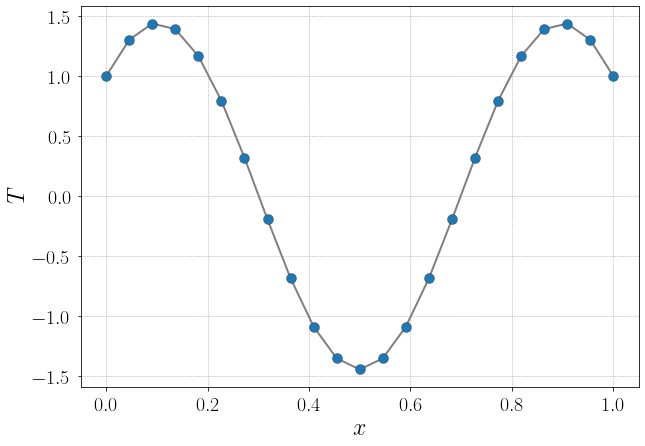

In [4]:
# Arreglo para almacenar la solución
T = np.zeros(N+2)
T[0]  = TA  # Frontera izquierda
T[-1] = TB  # Frontera derecha

# Lado derecho del sistema
b = np.zeros(N)
b[:] = S / r # Fuente o sumidero
b[0]  = T[0]   # Condición de frontera
b[-1] = T[-1]  # Condición de frontera

# Construcción de la matriz
A = buildMatrix(N, 2 - w**2/r)

# Solución del sistema lineal
T[1:N+1] = np.linalg.solve(A,b)

# Impresión y graficación de la solución
print('T = ', T)
x = np.linspace(0, L, N+2)
plt.figure(figsize=(10,7))
plt.plot(x, T, c='grey', lw=2.0)
plt.scatter(x, T, edgecolor='k', zorder= 10)
plt.xlabel('$x$')
plt.ylabel('$T$')
plt.grid()
#plt.savefig('calibracion1.pdf')
plt.show()

In [5]:
def solExact(x, w):
    """
    Cálculo de la solución exacta.
    """
    return ((1.0 - 1.0 * np.cos(w))/np.sin(w)) * np.sin(w * x) + np.cos(w * x)

In [6]:
Error = np.linalg.norm(solExact(x,w) - T, 2)
titulo = 'Ecuación : $\partial^2 u(x)/\partial x^2 = \omega^2 u(x); \,\,\, u(a) = u(b) = 1$'
numerica = 'Sol. Numérica : $E(h = %g) = %g$' % (h, Error)
exacta = 'Sol. Analítica : $u(x) = \\frac{1 - \cos(\omega)}{\sin(\omega)} \sin(\omega x) + \cos(\omega x)$'

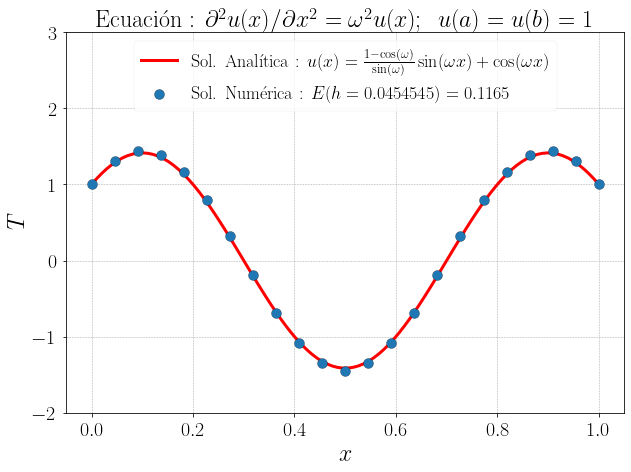

In [7]:
plt.figure(figsize=(10,7))
xsol = np.linspace(0,1,100)
plt.plot(xsol, solExact(xsol,w),'r-', label=exacta)
plt.scatter(x, T, edgecolor='k', zorder= 10, label=numerica)
plt.title(titulo)
plt.xlabel('$x$')
plt.ylabel('$T$')
plt.ylim(-2.0,3.0)
plt.legend(loc='upper center', fontsize=18)
plt.grid()
#plt.savefig('calibracion1_e.pdf')
plt.show()